In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml

In [2]:
ds = fetch_openml("mnist_784")

In [3]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(ds.DESCR)

In [11]:
np.set_printoptions(linewidth=160)

ds.data.iloc[0].values.reshape(28,28).astype('int')

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [12]:
ds.target[0]

'5'

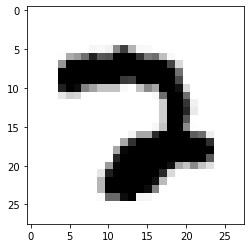

In [18]:
plt.imshow( ds.data.iloc[120].values.reshape(28,28).astype('int'), cmap="gray_r" )

In [19]:
ds.target[120]

'2'

In [20]:
X_train, X_test, y_train, y_test  = train_test_split(ds.data, ds.target, test_size=.2, random_state=0)

In [21]:
X_test.shape

(14000, 784)

In [22]:
model = KNeighborsClassifier(7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred = model.predict(X_test)

In [24]:
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2,3,4,5,6,7,8,9
0,1377,0,2,0,0,2,6,0,0,0
1,0,1577,2,0,0,0,0,1,0,0
2,11,14,1382,5,3,0,2,18,7,1
3,1,4,13,1376,1,13,0,8,14,5
4,2,7,0,0,1305,0,2,4,0,30
5,4,4,2,11,1,1185,15,2,1,6
6,6,2,2,0,5,8,1363,0,1,0
7,1,19,6,0,2,0,0,1414,1,15
8,1,21,2,17,5,20,4,3,1277,18
9,2,0,1,14,10,2,1,13,4,1314


In [25]:
model.score(X_test, y_test)

0.9692857142857143